In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.io
import seaborn as sns

In [2]:
os.chdir("..")
print(os.getcwd())

C:\Work\ASTAR\autoBearing


In [3]:
from data_scripts.CWRU import CWRU
from utils import set_seed_and_deterministic

In [4]:
# Download the raw CWRU files if it is not found
cwru_class = CWRU('raw_data', 'processed_data')
cwru_class.download_data()

  0%|          | 0/64 [00:00<?, ?it/s]

In [5]:
# Functions to extract the data from the .mat file
def read_cwru_mat_file(mat_file):
    mat_file_path = os.path.join('raw_data/CWRU', mat_file)
    mat_dict = scipy.io.loadmat(mat_file_path)
    de_key, fe_key = find_right_keys(mat_dict)
    de_data, fe_data = mat_dict[de_key], mat_dict[fe_key]
    
    return de_data, fe_data
    
def find_right_keys(mat_dict): #? Finds the right key to get the DE and FE data
    for key in mat_dict:
        if key[-7:] == 'DE_time':
            de_key = key
        elif key[-7:] == 'FE_time':
            fe_key = key
        else:
            pass
    return de_key, fe_key

# Data Analysis

In [20]:
# Using 97.mat, 98.mat, 99.mat, 100.mat, and 105 as example to observe the data
de_data_97, fe_data_97 = read_cwru_mat_file('97.mat')
print(de_data_97, fe_data_97)
print(de_data_97.shape, fe_data_97.shape)

[[ 0.05319692]
 [ 0.08866154]
 [ 0.09971815]
 ...
 [-0.03463015]
 [ 0.01668923]
 [ 0.04693846]] [[0.14566727]
 [0.09779636]
 [0.05485636]
 ...
 [0.14053091]
 [0.09553636]
 [0.09019455]]
(243938, 1) (243938, 1)


In [7]:
de_data_98, fe_data_98 = read_cwru_mat_file('98.mat')
de_data_99, fe_data_99 = read_cwru_mat_file('99.mat')
de_data_100, fe_data_100 = read_cwru_mat_file('100.mat')
de_data_105, fe_data_105 = read_cwru_mat_file('105.mat')

print(de_data_97.shape, de_data_98.shape, de_data_99.shape, de_data_100.shape, de_data_105.shape)
print(fe_data_97.shape, fe_data_98.shape, fe_data_99.shape, fe_data_100.shape, fe_data_105.shape)

(243938, 1) (483903, 1) (485063, 1) (485643, 1) (121265, 1)
(243938, 1) (483903, 1) (485063, 1) (485643, 1) (121265, 1)


Each .mat file has different lengths and must be modified so that each file has the same length. 2 options of doing this are:
- Truncating
- Subsampling

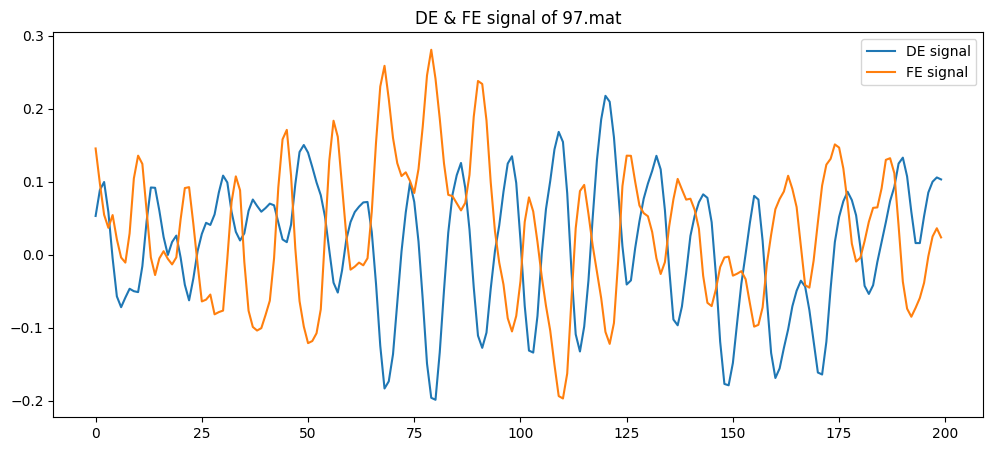

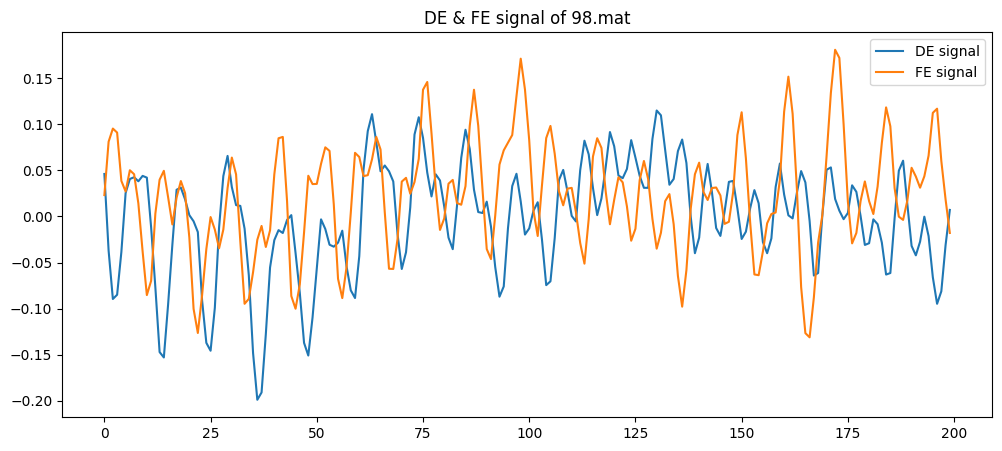

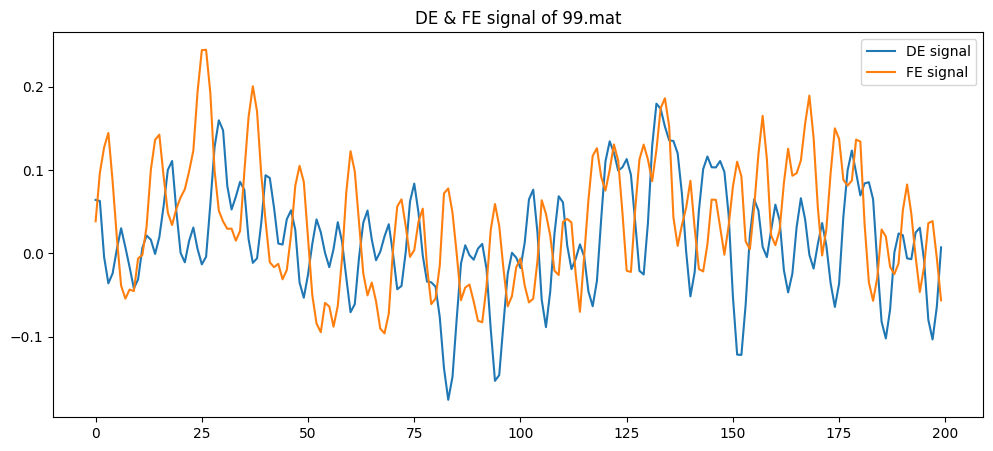

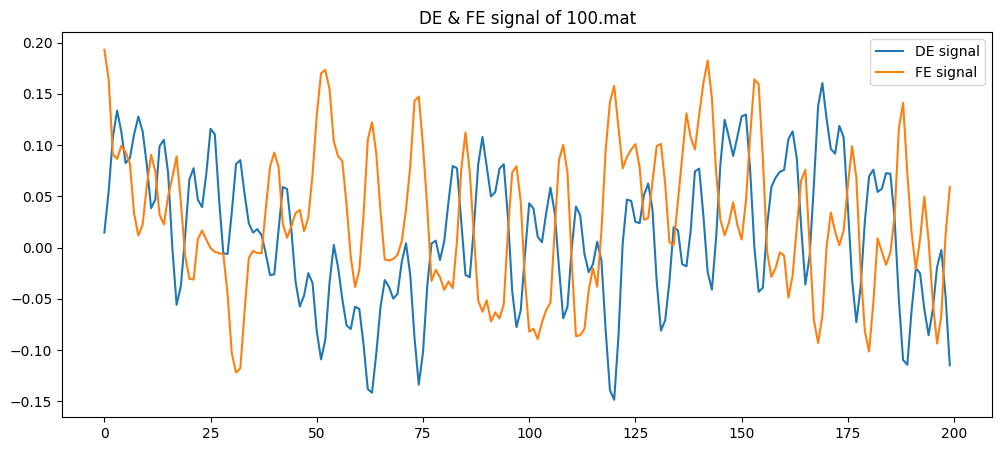

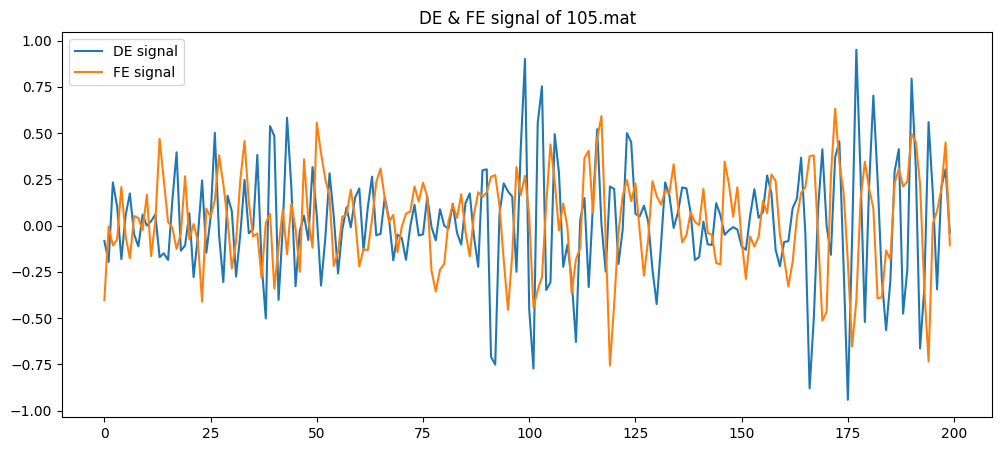

In [19]:
def plot_DE_FE(de_data, fe_data, mat_file, length = 200):
    plt.figure(figsize=(12,5))
    de_df, fe_df = pd.DataFrame(de_data), pd.DataFrame(fe_data)
    
    plt.title(f'DE & FE signal of {mat_file}')
    plt.plot(de_data[0:200], label='DE signal')
    plt.plot(fe_data[0:200], label='FE signal')
    
    plt.legend() 
    plt.show()

plot_DE_FE(de_data_97, fe_data_97, '97.mat')
plot_DE_FE(de_data_98, fe_data_98, '98.mat')
plot_DE_FE(de_data_99, fe_data_99, '99.mat')
plot_DE_FE(de_data_100, fe_data_100, '100.mat')
plot_DE_FE(de_data_105, fe_data_105, '105.mat')

Because the sampling rate between each file seem similar, the signal will be truncated to the same length.

# Data preparation

In [ ]:
########################################################################################
#### Load all data, make them the same length and create corresponding class labels ####
########################################################################################

sample_duration = 12000 * 10 #? 12,000 sampling rate for 10 seconds

# List of all the file name corresponding to each class label
# Working condition need to add at the end, for example 'Normal_2' or 'IR014_1'
class_n_files = {
    0: ['Normal_'], # Healthy_class
    1: ['IR007_', 'IR014_', 'IR021_'], # Inner_fault_class
    2: ['B007_', 'B014_', 'B021_'], # Bearing_fault_class
    3: ['OR007@6_', 'OR014@6_', 'OR021@6_'] # Outer_fault_class
}

def load_all_files(working_condition, length = sample_duration):
    for class_label, file_list in class_n_files.items():
        for file_name in file_list:
            proper_file_name = file_name + str(working_condition) # Convert 'IR007_' to 'IR007_1' or similarly
            mat_file_name = cwru_class.mat_file_name[proper_file_name] # Convert 'Normal_0' to its 97.mat
            de_data, fe_data = read_cwru_mat_file(mat_file_name) # Function defined in cell 5
            

In [ ]:
# Working condition need to add at the end, for example 'Normal_2'
Healthy_class = ['Normal_']
Inner_fault_class = ['IR007_', 'IR014_', 'IR021_']
Bearing_fault_class = ['B007_', 'B014_', 'B021_']
Outer_fault_class = ['OR007@6_', 'OR014@6_', 'OR021@6_']